# 1.Import the libraries, load dataset, print shape of data, data description

In [1]:
# install and import necessary libraries.
# Import necessary libraries.
import re, string, unicodedata
import pandas as pd
import nltk           
                        # Natural language processing tool-kit
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

!pip install contractions
import contractions


from bs4 import BeautifulSoup                 # Beautiful soup is a parsing library that can use different parsers.
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, wordnet    # Stopwords, and wordnet corpus
from nltk.stem import LancasterStemmer, WordNetLemmatizer  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
from google.colab import files
  
  
uploaded = files.upload()

Saving Tweets.csv to Tweets (7).csv


In [4]:
import pandas as pd
import io
  
df = pd.read_csv(io.BytesIO(uploaded['Tweets.csv']))
print(df)

                 tweet_id  ...               user_timezone
0      570306133677760513  ...  Eastern Time (US & Canada)
1      570301130888122368  ...  Pacific Time (US & Canada)
2      570301083672813571  ...  Central Time (US & Canada)
3      570301031407624196  ...  Pacific Time (US & Canada)
4      570300817074462722  ...  Pacific Time (US & Canada)
...                   ...  ...                         ...
14635  569587686496825344  ...                         NaN
14636  569587371693355008  ...                         NaN
14637  569587242672398336  ...                         NaN
14638  569587188687634433  ...  Eastern Time (US & Canada)
14639  569587140490866689  ...                         NaN

[14640 rows x 15 columns]


In [5]:
df.shape

(14640, 15)

In [6]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [7]:
df.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# 2. Understand of data-columns: 


### a. Drop all other columns except “text” and “airline_sentiment”.

In [8]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [9]:
data=df.drop(['tweet_id','airline_sentiment_confidence','negativereason', 'negativereason_confidence', 'airline','airline_sentiment_gold', 'name', 'negativereason_gold','retweet_count', 'tweet_coord', 'tweet_created','tweet_location', 'user_timezone'],axis=1)


### b. Check the shape of data.

In [10]:
print(data.shape)



(14640, 2)


### c. Print first 5 rows of data

In [11]:
print(data.head(5))

  airline_sentiment                                               text
0           neutral                @VirginAmerica What @dhepburn said.
1          positive  @VirginAmerica plus you've added commercials t...
2           neutral  @VirginAmerica I didn't today... Must mean I n...
3          negative  @VirginAmerica it's really aggressive to blast...
4          negative  @VirginAmerica and it's a really big bad thing...


# 3. Text pre-processing: Data preparation

#### a. Html tag removal.

In [12]:
for i, row in data.iterrows():
    clean_text = re.sub(r"http\S+", "", data.at[i, 'text'])
    data.at[i,'text'] = clean_text
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [13]:
def replace_contractions(text):
    return contractions.fix(text)

for i, row in data.iterrows():
    text = data.at[i, 'text']
    clean_text = replace_contractions(text)
    data.at[i,'text'] = clean_text
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials...
2,neutral,@VirginAmerica I did not today... Must mean I ...
3,negative,@VirginAmerica it is really aggressive to blas...
4,negative,@VirginAmerica and it is a really big bad thin...


### c. Remove the numbers.

In [14]:

def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

data['text'] = data['text'].apply(lambda x: remove_numbers(x))
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials...
2,neutral,@VirginAmerica I did not today... Must mean I ...
3,negative,@VirginAmerica it is really aggressive to blas...
4,negative,@VirginAmerica and it is a really big bad thin...


## b. Tokenization.

In [15]:
for i, row in data.iterrows():
    text = data.at[i, 'text']
    words = nltk.word_tokenize(text)
    data.at[i,'text'] = words
data.head()

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, have, added, com..."
2,neutral,"[@, VirginAmerica, I, did, not, today, ..., Mu..."
3,negative,"[@, VirginAmerica, it, is, really, aggressive,..."
4,negative,"[@, VirginAmerica, and, it, is, a, really, big..."


### d. Removal of Special Characters and Punctuations

In [16]:
def remove_non_ascii(words):
    new_words = []                        
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)        
    return new_words


In [17]:
def remove_punctuation(words):
    new_words = []                        
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)   
    return new_words

### e. Conversion to lowercase.

In [18]:
def to_lowercase(words):
    new_words = []                        
    for word in words:
        new_word = word.lower()          
        new_words.append(new_word)       
    return new_words

### f. Lemmatize or stemming

In [19]:
def stem_words(words):
    stemmer = LancasterStemmer()
    stems = []                            
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)                
    return stems

### g. Join the words in the list to convert back to text string in the dataframe. (So that each row contains the data in text format.)


In [20]:
def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    return ' '.join(words) # List is being converted back to string 

In [21]:
for i, row in data.iterrows():
    words = data.at[i, 'text']
    words = normalize(words)
    data.at[i,'text'] = words
data.head()

,airline_sentiment,text
0,neutral,virginamerica what dhepburn said
1,positive,virginamerica plus you have added commercials ...
2,neutral,virginamerica i did not today must mean i need...
3,negative,virginamerica it is really aggressive to blast...
4,negative,virginamerica and it is a really big bad thing...


### h. Print first 5 rows of data after pre-processing.


In [22]:
data.head(5)

,airline_sentiment,text
0,neutral,virginamerica what dhepburn said
1,positive,virginamerica plus you have added commercials ...
2,neutral,virginamerica i did not today must mean i need...
3,negative,virginamerica it is really aggressive to blast...
4,negative,virginamerica and it is a really big bad thing...


### Verify preprossing was successful


In [23]:
print(df.iloc[0]) #orginial text


tweet_id                                         570306133677760513
airline_sentiment                                           neutral
airline_sentiment_confidence                                      1
negativereason                                                  NaN
negativereason_confidence                                       NaN
airline                                              Virgin America
airline_sentiment_gold                                          NaN
name                                                        cairdin
negativereason_gold                                             NaN
retweet_count                                                     0
text                            @VirginAmerica What @dhepburn said.
tweet_coord                                                     NaN
tweet_created                             2015-02-24 11:35:52 -0800
tweet_location                                                  NaN
user_timezone                            Eastern

In [24]:
print(data.iloc[0]) # cleaned text

airline_sentiment                             neutral
text                 virginamerica what dhepburn said
Name: 0, dtype: object


# 4. Vectorization: 


### a. Use CountVectorizer.


In [26]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1000)                
count_data_features = vectorizer.fit_transform(data['text'])
count_data_features = count_data_features.toarray()   

### b. Use TfidfVectorizer.

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)
vect_data_features = vectorizer.fit_transform(data['text'])
vect_data_features = vect_data_features.toarray()
vect_data_features.shape

(14640, 1000)

# 5. Fit and evaluate model using both type of vectorization


### a. CountVectorizer Model 

In [28]:
labels = data['airline_sentiment']
labels.dtype

dtype('O')

In [29]:
labels

0         neutral
1        positive
2         neutral
3        negative
4        negative
           ...   
14635    positive
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14640, dtype: object

In [30]:
sentiment =  {'neutral': 0 ,'positive': 1,'negative': 2}

In [31]:
data.airline_sentiment = [sentiment[item] for item in data.airline_sentiment]


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(count_data_features, labels, test_size=0.3, random_state=42)

In [33]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, count_data_features, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7112021857923497


CountVectorizer Model_conf_mat


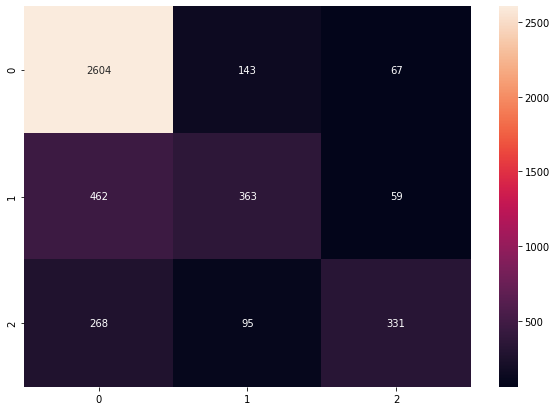

In [34]:
result = forest.predict(X_test)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, result)
print("CountVectorizer Model_conf_mat")
df_cm = pd.DataFrame(conf_mat, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

### b. TfidfVectorizer Model

In [35]:
X_train, X_test, y_train, y_test = train_test_split(vect_data_features, labels, test_size=0.3, random_state=1)
forest = RandomForestClassifier(n_estimators=10, n_jobs=4)
forest = forest.fit(X_train, y_train)
print(forest)
print(np.mean(cross_val_score(forest, vect_data_features, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7129098360655737


TfidfVectorizer Model_conf_mat


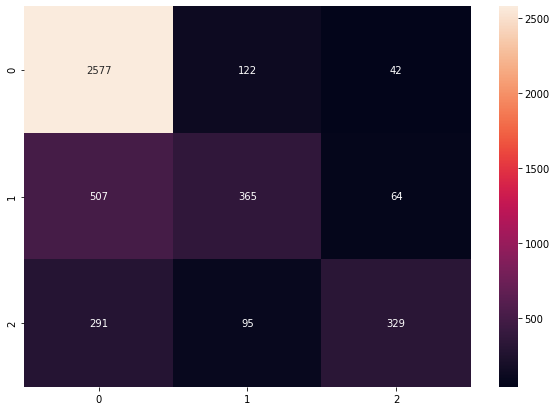

In [36]:
result = forest.predict(X_test)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, result)
print("TfidfVectorizer Model_conf_mat")
df_cm = pd.DataFrame(conf_mat, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

#  Summarize your understanding of the application of Various Pre-processing and Vectorization and performance of your model on this dataset

Many preprocessing steps were performed on the original data set to remove the unnecessary text or revise the existing text to allow the ML models to interpret and make predictions on each tweet more accurately. The preprocessing steps included 

*  Removing all HTML tags 
*   Removing special characters - including "@" signs, which are regularly used in tweets 
*   replacing capital letters with lowercase - so matching words would not be 
*   Utilized stemming - to remove plural and tenses of words


Overall the CountVectorizer Model & the TfidfVectorizer Model performed very similarly. The TfidfVectorizer Model was slightly better as its cross-validation score was 0.72, 0.01 better than the CountVectorizer Model. Both models were built with the same hyperparameters and features, creating consistency between both model's evaluations.


# Github Link
https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-aug20-c4bantle/blob/master/NLP_Twitter_US_Airline_Sentiment_Clayton_Bantle.ipynb